<a href="https://colab.research.google.com/github/harnalashok/exercises/blob/main/bank_customer_churn_eda_Abhishek%20Kumar%20Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 7th April, 2021
# Author: Abhishek Kumar Singh (on Kaggle)
# Kaggle page: https://www.kaggle.com/abhi4u07/bank-customer-churn-eda
# Commented by: Ashok Kumar Harnal
# Myfolder: C:\Users\ashok\OneDrive\Documents\bank_customers_churn
#           github/data visualization
# Data source: https://www.kaggle.com/louishgy/churn-modelling
# Objectives:
#             i) To understand importance of IDs
#            ii) Understanding ecdf plots
#            iii)Understanding pointplots
#             iv)Quick country plot

In [ ]:
# 1.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
# 1.1
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 1.2
data = pd.read_csv("Churn_Modelling.csv")

In [ ]:
# 1.2.1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# 1.2.2
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# 1.2.3
data.shape

(10000, 14)

In [ ]:
# 1.2.4
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# 1.3
for i in range(len(data.columns)):
        print('Column_Name ------->',data.columns[i], '    ######    ','Unique values count in dataset ----->', len(data[data.columns[i]].unique()) )

Column_Name -------> RowNumber     ######     Unique values count in dataset -----> 10000
Column_Name -------> CustomerId     ######     Unique values count in dataset -----> 10000
Column_Name -------> Surname     ######     Unique values count in dataset -----> 2932
Column_Name -------> CreditScore     ######     Unique values count in dataset -----> 460
Column_Name -------> Geography     ######     Unique values count in dataset -----> 3
Column_Name -------> Gender     ######     Unique values count in dataset -----> 2
Column_Name -------> Age     ######     Unique values count in dataset -----> 70
Column_Name -------> Tenure     ######     Unique values count in dataset -----> 11
Column_Name -------> Balance     ######     Unique values count in dataset -----> 6382
Column_Name -------> NumOfProducts     ######     Unique values count in dataset -----> 4
Column_Name -------> HasCrCard     ######     Unique values count in dataset -----> 2
Column_Name -------> IsActiveMember     #####

<font color = "red">AA. Importance of IDs</font>

In [ ]:
# 2.0
data['CustomerId'].min()   # 15565701
print()
data['CustomerId'].max()   # 15815690

15565701

15815690

In [ ]:
# 2.1
## SHOULD CUSTOMERID BE DROPPED? MAYBE IF CUSTOMERID IS 15634602, THERE
## IS SOME MEANING TO 15-63-4-602. IN THAT CASE BREAK IT DOWN INTO PIECES
## AND ANALYSE PIECES. MY ROLL NUMBER : 68EB13
data.drop(columns=['RowNumber','CustomerId','Surname'], inplace = True)
data.shape

(10000, 11)

In [ ]:
#Questions

#Univariate Categorical
#Q1 - How Geography is distributed
#Q2 - How Gender is distributed
#Q3 - How Tenure is distributed
#Q4 - How NumOfProducts is distributed
#Q5 - How HasCrCard is distributed 
#Q6 - How IsActiveMember is distributed

#Univariate Continuous
#Q7 - How CreditScore is distribued
#Q8 - How Age is distribued
#Q9 - How Balance is distributed
#Q10 - How EstimatedSalary is distributed

#Continuous vs continuous variables
#Q6 - How CreditScore and Estimated salary are releted
#Q7 - How CreditScore and Age are releted
#Q8 - How Age and balance are releted
#Q9 - How Age and NumOfProducts are releted
#Q10 - How age and Estimated salary are releted
#Q11 - How CreditScore and Balance are releted.

#Continuous and Categorical variables
#Q12 - How CreditScore is releted to Exited
#Q13 - How Age is releted to Exited
#Q14 - How Tenure is releted to Exited
#Q15 - How Balance is releted to Exited
#Q16 - How NoofProducts is releted to Exited
#Q17 - How EstimatedSalary is releted to Exited

#Categorical vs categorical
#Q18 - How Geography is releted to exited
#Q19 - How gender is releted to exited
#Q20 - How HasCrCard is releted to exited
#Q21 - How IsActiveMember is releted to exited

#Q22 - See how any continuous variable & categorical variable is releted with target variable.


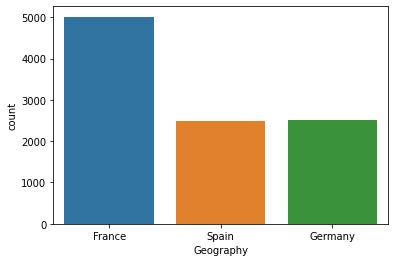

In [ ]:
# 2.2
_=sns.countplot(data = data, x='Geography')

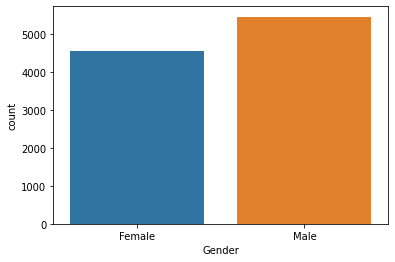

In [ ]:
# 2.3
_=sns.countplot(data = data, x='Gender')

<font color = "red">BB. Too many bars: Use density plot</font>

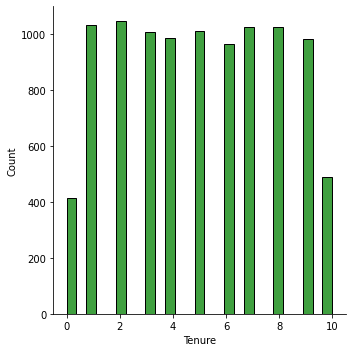

In [ ]:
# 3.0
#### TOO MANY BARS PLOT DENSITY PLOT
_=sns.displot(data = data, x ='Tenure', kind = 'hist', color = 'g')

#### Empirical cumulative distribution plot(ecdf):


In statistics, an empirical distribution function (commonly also called an empirical Cumulative Distribution Function, eCDF) is the distribution function associated with a sample (as against CDF for a population). <br>
This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value.   
Reference [Wikipedia](https://en.wikipedia.org/wiki/Empirical_distribution_function)


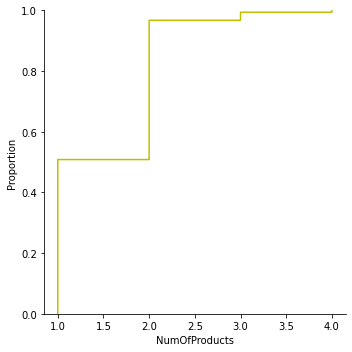

In [ ]:
# 3.1
_=sns.displot(data = data, x = 'NumOfProducts', kind = 'ecdf', color ='y')

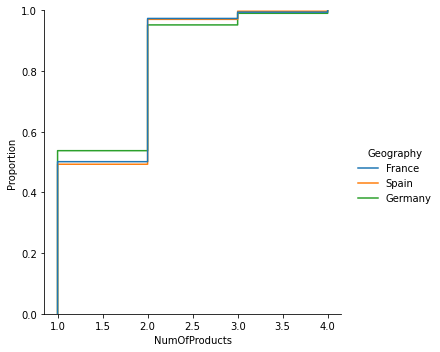

In [ ]:
# 3.2 A comparative ecdf plot
_=sns.displot(data = data, x = 'NumOfProducts',hue = 'Geography', kind = 'ecdf', color ='y')

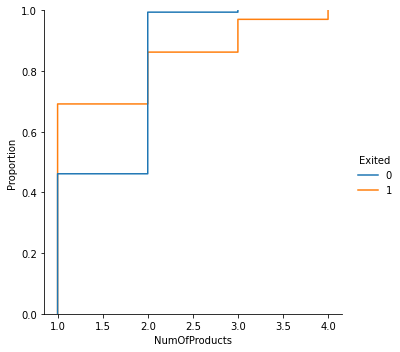

In [ ]:
# 3.3
_=sns.displot(data = data, x = 'NumOfProducts',hue = 'Exited', kind = 'ecdf', color ='y')

In [ ]:
# 3.3.1 The following value counts is equivalent to above graph
data.loc[data['Exited'] == 0, ['Exited','NumOfProducts']].value_counts(normalize = True)
print("\n-------\n")
data.loc[data['Exited'] == 1, ['Exited','NumOfProducts']].value_counts(normalize = True)


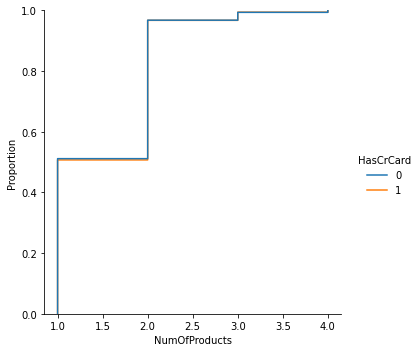

In [ ]:
# 3.4
_=sns.displot(data = data, x = 'NumOfProducts',hue = 'HasCrCard', kind = 'ecdf', color ='y')

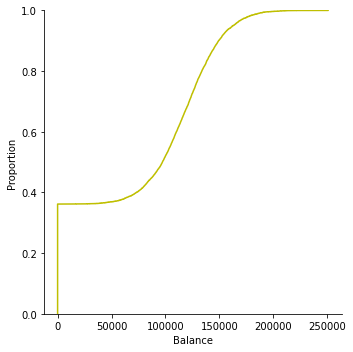

In [ ]:
# 3.5
_=sns.displot(data = data, x = 'Balance', kind = 'ecdf', color ='y')

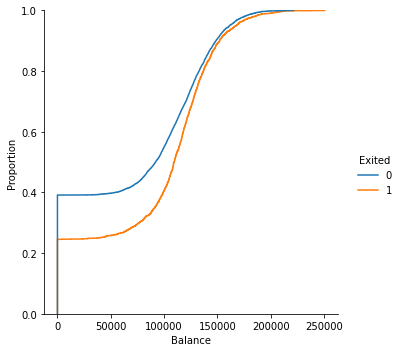

In [ ]:
# 3.6
_=sns.displot(data = data, x = 'Balance',hue = 'Exited', kind = 'ecdf', color ='y')

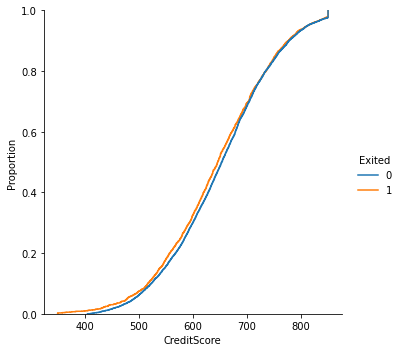

In [ ]:
# 3.7
_=sns.displot(data = data, x = 'CreditScore',hue = 'Exited', kind = 'ecdf', color ='y')

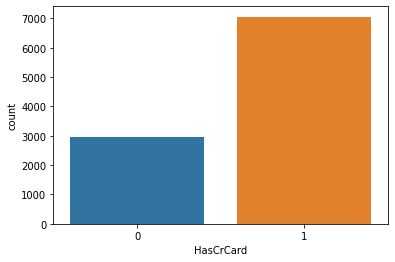

In [ ]:
# 4.0
_=sns.countplot(data = data, x ='HasCrCard')

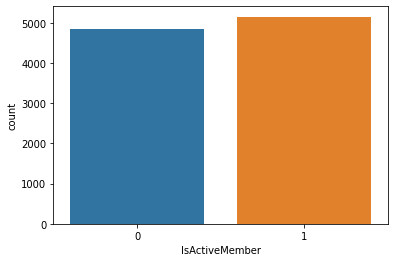

In [ ]:
# 4.1
_=sns.countplot(data = data, x ='IsActiveMember')

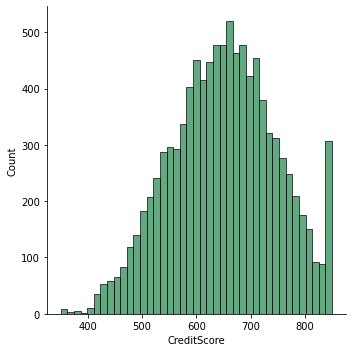

In [ ]:
# 4.2
_= sns.displot(data = data, x ='CreditScore', kind='hist', color ='seagreen')

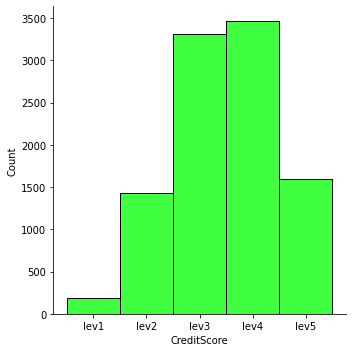

In [ ]:
# 5.0
x1 = pd.cut(data['CreditScore'],
            bins = [300,450,550,650,750,900],           
            labels= ["lev1", "lev2","lev3", "lev4", "lev5"]
        )

_=sns.displot(data = x1,  kind = 'hist', color ='lime')

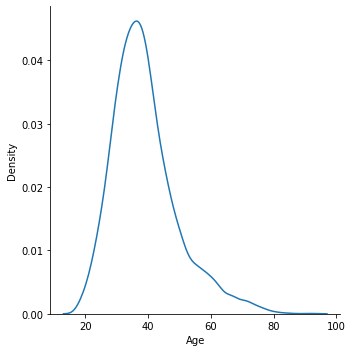

In [ ]:
# 5.1
_=sns.displot(data = data,x = 'Age',  kind = 'kde')

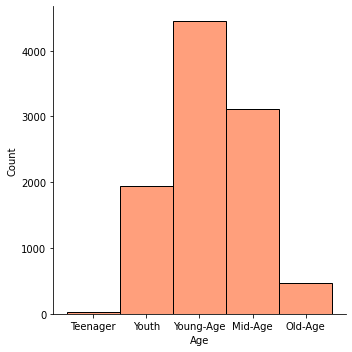

In [ ]:
# 5.2
x2 = pd.cut(data['Age'],
            bins = [0,18,30,40,60,100],           
            labels= ["Teenager", "Youth","Young-Age", "Mid-Age", "Old-Age"]
        )
_=sns.displot(data = x2,  kind = 'hist',color ='coral')

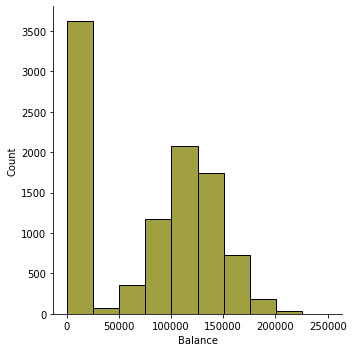

In [ ]:
# 5.3
_=sns.displot(data = data,x = 'Balance',  kind = 'hist', bins =10,color ='olive')

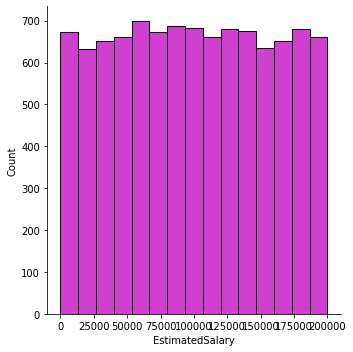

In [ ]:
# 5.4
_=sns.displot(data = data,x = 'EstimatedSalary',  kind = 'hist', bins = 15, color ='m')

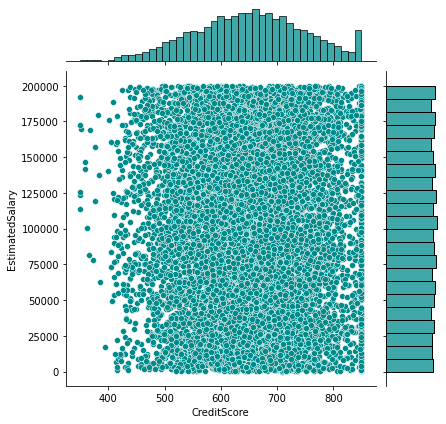

In [ ]:
# 5.5
_= sns.jointplot(
                 data = data,
                 x = 'CreditScore',
                 y = 'EstimatedSalary',
                 kind = "scatter",
                 color = 'darkcyan'
                )

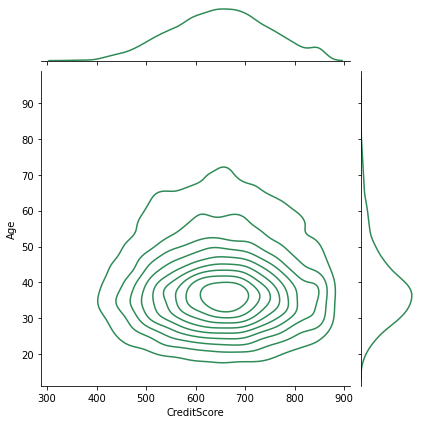

In [ ]:
# 5.6
_= sns.jointplot(
                 data = data,
                 x = 'CreditScore',
                 y = 'Age',
                 kind = "kde",
                 color = 'seagreen'
                )

<font color = "red">CC. Do not forget 'target; while drawing jointplots</font>

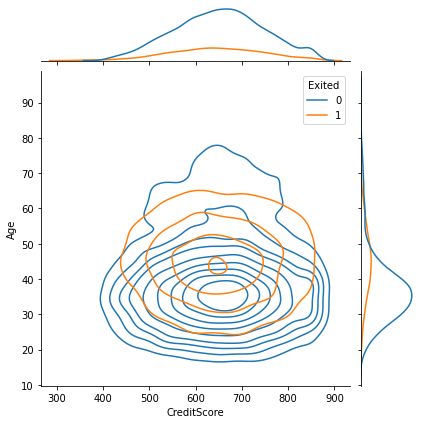

In [ ]:
# 6.0
_= sns.jointplot(
                 data = data,
                 x = 'CreditScore',
                 y = 'Age',
                 hue = 'Exited',
                 kind = "kde",
                 color = 'seagreen'
                )

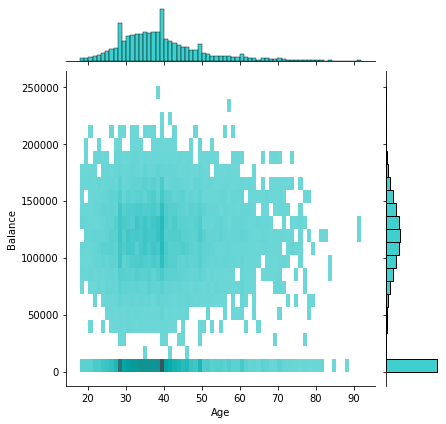

In [ ]:
# 6.1
_= sns.jointplot(
                 data = data,
                 x = 'Age',
                 y = 'Balance',
                 kind = "hist",
                 color = 'c'
                )

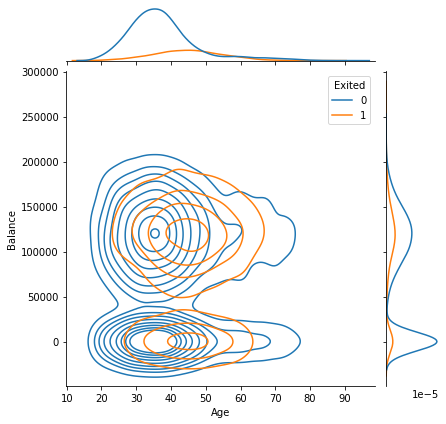

In [ ]:
# 6.2
_= sns.jointplot(
                 data = data,
                 x = 'Age',
                 y = 'Balance',
                 hue = 'Exited',
                 kind = "kde",
                 color = 'c'
                )

<font color = "red">DD. Hexplot is drawn between two numeric features not between one numeric and one continuous.</font>. See this [reference](https://seaborn.pydata.org/examples/hexbin_marginals.html).

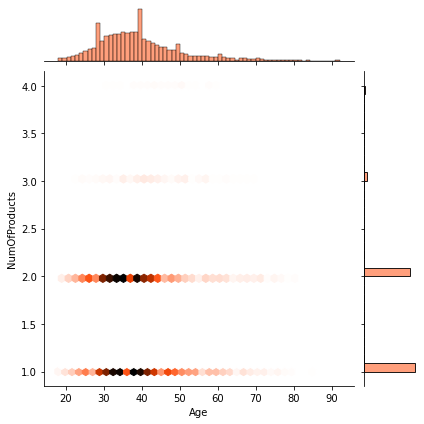

In [ ]:
# 7.0
_= sns.jointplot(
                 data = data,
                 x = 'Age',
                 y = 'NumOfProducts',
                 kind = "hex",
                 color = 'coral'
                )

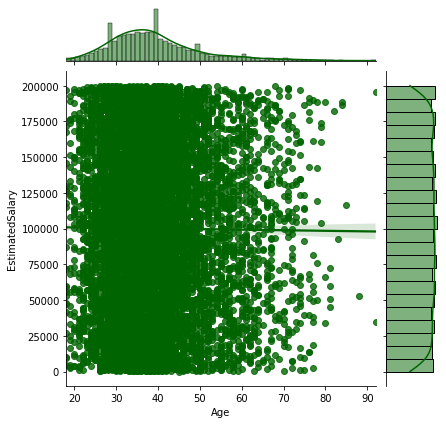

In [ ]:
# 7.1
_= sns.jointplot(
                 data = data,
                 x = 'Age',
                 y = 'EstimatedSalary',
                 kind = "reg",
                 color = 'darkgreen'
                )

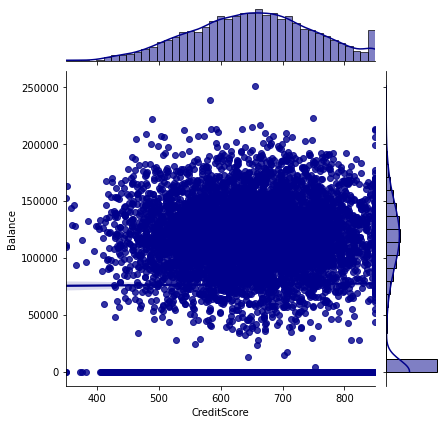

In [ ]:
# 7.3
_= sns.jointplot(
                 data = data,
                 x = 'CreditScore',
                 y = 'Balance',
                 kind = "reg",
                 color = 'darkblue'
                )

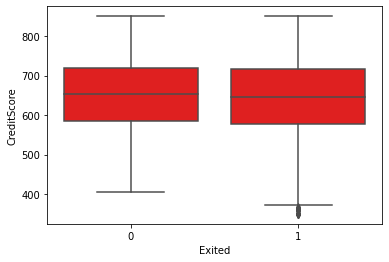

In [ ]:
# 7.4
_=sns.boxplot(x = 'Exited',       
              y = 'CreditScore', 
              data = data,
              color = 'r'
              )

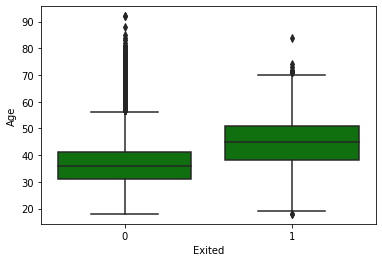

In [ ]:
# 8.0
_=sns.boxplot(x = 'Exited',       
              y = 'Age', 
              data = data,
              color = 'g'
              )

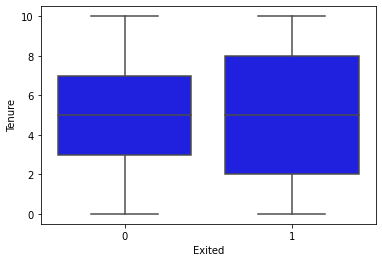

In [ ]:
# 8.1
_=sns.boxplot(x = 'Exited',       
              y = 'Tenure', 
              data = data,
              color = 'b'
              )

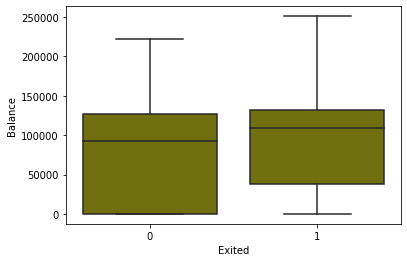

In [ ]:
# 8.2
_=sns.boxplot(x = 'Exited',       
              y = 'Balance', 
              data = data,
              color = 'olive'
              )

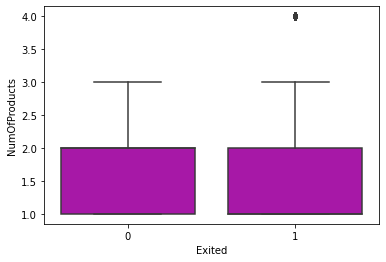

In [ ]:
# 8.3
_=sns.boxplot(x = 'Exited',       
              y = 'NumOfProducts', 
              data = data,
              color = 'm'
              )

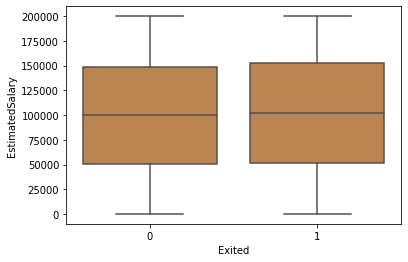

In [ ]:
# 8.4
_=sns.boxplot(x = 'Exited',       
              y = 'EstimatedSalary', 
              data = data,
              color = 'peru'
              )

Crosstabs and heatplots

In [ ]:
# 9.0
df1 = pd.crosstab(data['Geography'], data['Exited'])
df1

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


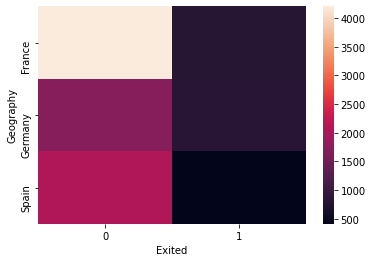

In [ ]:
_= sns.heatmap(df1)

In [ ]:
# 9.1
df2 = pd.crosstab(data['Gender'], data['Exited'])
df2

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [ ]:
_= sns.heatmap(df2)

<font color= "red"> DD. Use heatmap to summarise a numeric feature with respect to two categorical features>

In [ ]:
# 9.2
df2 = pd.crosstab(
                  data['Gender'],
                  data['Exited'],
                  values = data['EstimatedSalary'],
                  aggfunc = np.mean
                  )
df2

Exited,0,1
Gender,,
Female,99816.071486,102948.986093
Male,99680.391827,99584.287272


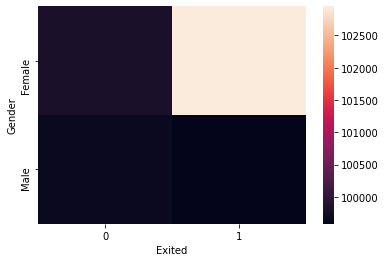

In [ ]:
# 9.3
# AMONG THOSE WHO HAVE EXITED AND ARE FEMALES
# THEIR MEAN ESTIMATED SALARY IS HIGH
_= sns.heatmap(df2)

In [ ]:
# 9.4
df2 = pd.crosstab(
                  data['Gender'],
                  data['Exited'],
                  values = data['Balance'],
                  aggfunc = np.mean
                  )
df2

Exited,0,1
Gender,,
Female,71183.249639,89036.639359
Male,73911.607037,93736.483742


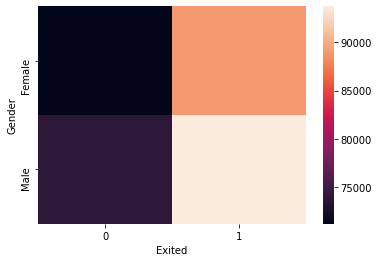

In [ ]:
# 9.5
# AMONG THOSE WHO HAVE EXITED AND ARE MALES
# THEIR MEAN ESTIMATED BALANCE IS HIGH
# THOSE WHO HAVE NOT EXITED MEAN BALANCE IS LOW
_= sns.heatmap(df2)

In [ ]:
# 9.6
df3 = pd.crosstab(data['HasCrCard'], data['Exited'])
df3

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


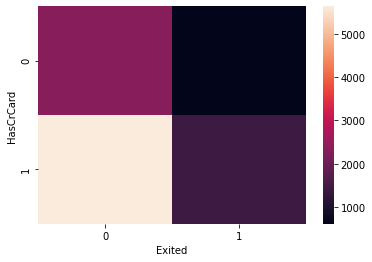

In [ ]:
# 9.6.1
_= sns.heatmap(df3)

In [ ]:
# 9.7
df4 = pd.crosstab(data['IsActiveMember'], data['Exited'])
df4

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


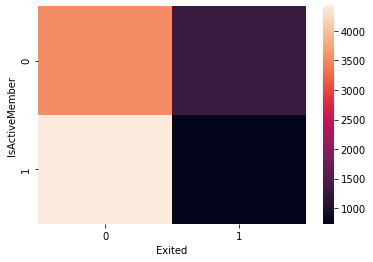

In [ ]:
# 9.7.1
_= sns.heatmap(df4)

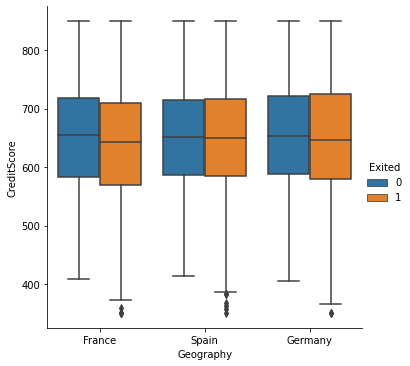

In [ ]:
# 10.0
_= sns.catplot(
                x = 'Geography',
                y = 'CreditScore',
                hue = 'Exited',
                kind ='box',
                data = data
               )

<font color = "red">EE. Boxen plots: See this StackOverflow [reference](https://stackoverflow.com/a/65894078)</font>

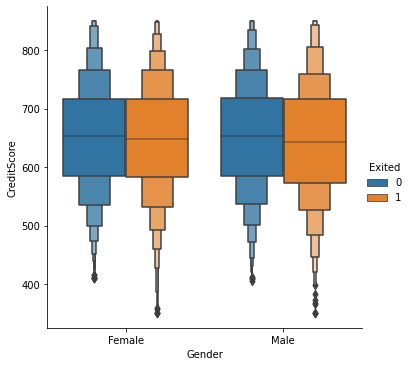

In [ ]:
# 11.0 These boxen plots do not show
#      any difference in distribution
#      for 'Exited' and not 'Exited'
_= sns.catplot(
                x = 'Gender',
                y = 'CreditScore',
                hue = 'Exited',
                kind ='boxen',
                data = data
               )

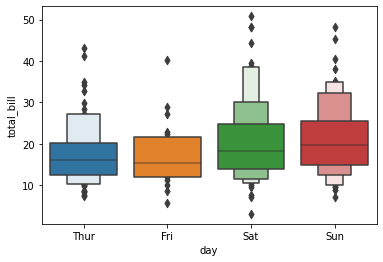

In [ ]:
# 11.1 These boxen plots show clear
#      between 'total_bill' on 
#      various days:

tips = sns.load_dataset("tips")
_= sns.boxenplot(x="day", y="total_bill", data=tips)

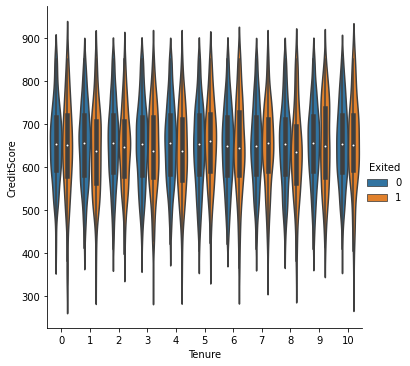

In [ ]:
# 11.2
# DOES HIGHER TENURE LEAD TO HIGH CREDIT SCORE---NO
_= sns.catplot(x = 'Tenure', y = 'CreditScore', hue = 'Exited', kind ='violin', data = data)

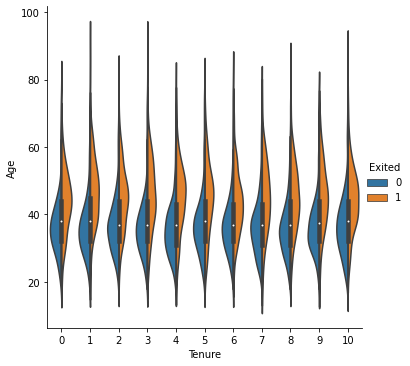

In [ ]:
# 11.3 IRRECTPECTIVE OF TENURE DISTRIBUTION OF AGE IS SAME IN BOTH CASES
_= sns.catplot(x = 'Tenure', y = 'Age', hue = 'Exited', kind ='violin', data = data, split=True)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


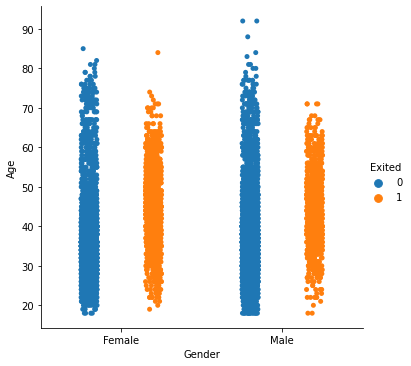

In [ ]:
# 11.4
_= sns.catplot(x = 'Gender', y = 'Age', hue = 'Exited', kind ='strip', data = data, split=True)

<font color = "red">FF. Pointplots
See below</red>

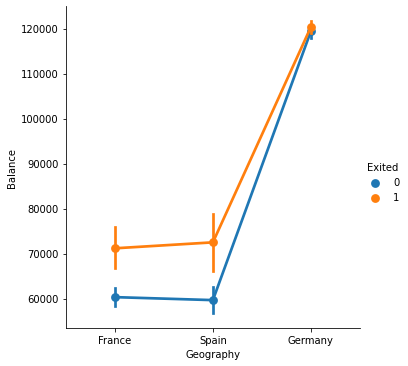

In [ ]:
# 12.0
_= sns.catplot(x = 'Geography',
               y = 'Balance',
               hue = 'Exited',
               kind ='point',
               data = data,
               split=True)

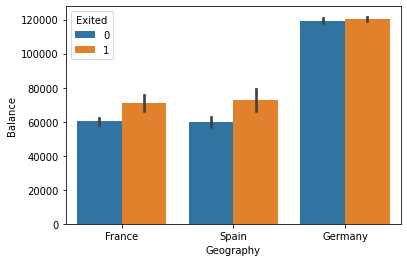

In [ ]:
# 12.1 The above plot and the following are equivalent
_= sns.barplot(x = 'Geography',
               y = 'Balance',
               hue = 'Exited',
               data = data
               )

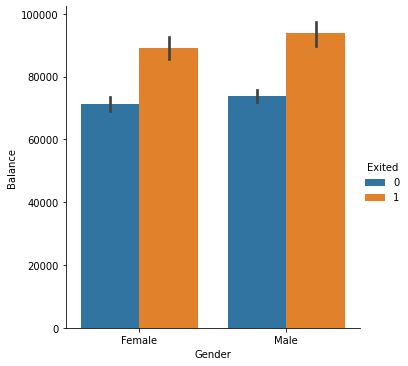

In [ ]:
# 12.2 
_= sns.catplot(
               x = 'Gender',
               y = 'Balance',
               hue = 'Exited',
               kind ='bar',
               data = data
               )

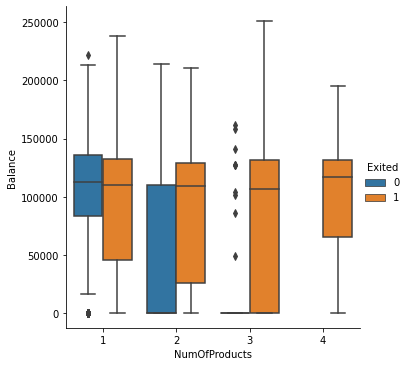

In [ ]:
# 12.3
_= sns.catplot(x = 'NumOfProducts', y = 'Balance', hue = 'Exited', kind ='box', data = data)

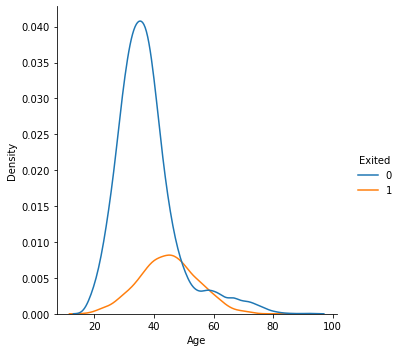

In [ ]:
# 12.4
_= sns.displot(data = data, x = 'Age', hue = 'Exited', kind = 'kde')

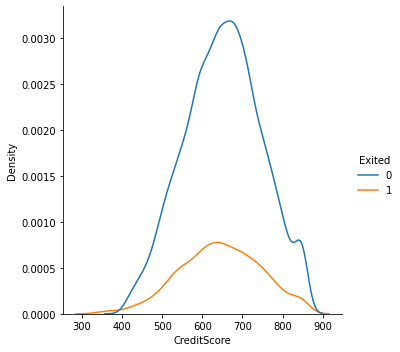

In [ ]:
# 12.5
_= sns.displot(data = data, x = 'CreditScore', hue = 'Exited', kind = 'kde')

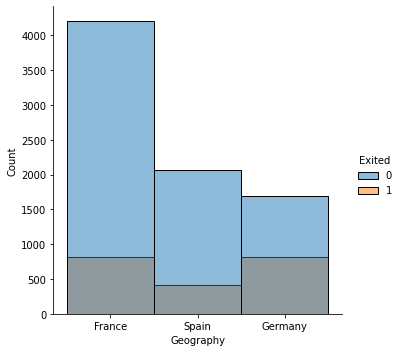

In [ ]:
# 12.6
_= sns.displot(data = data, x = 'Geography', hue = 'Exited', kind = 'hist')

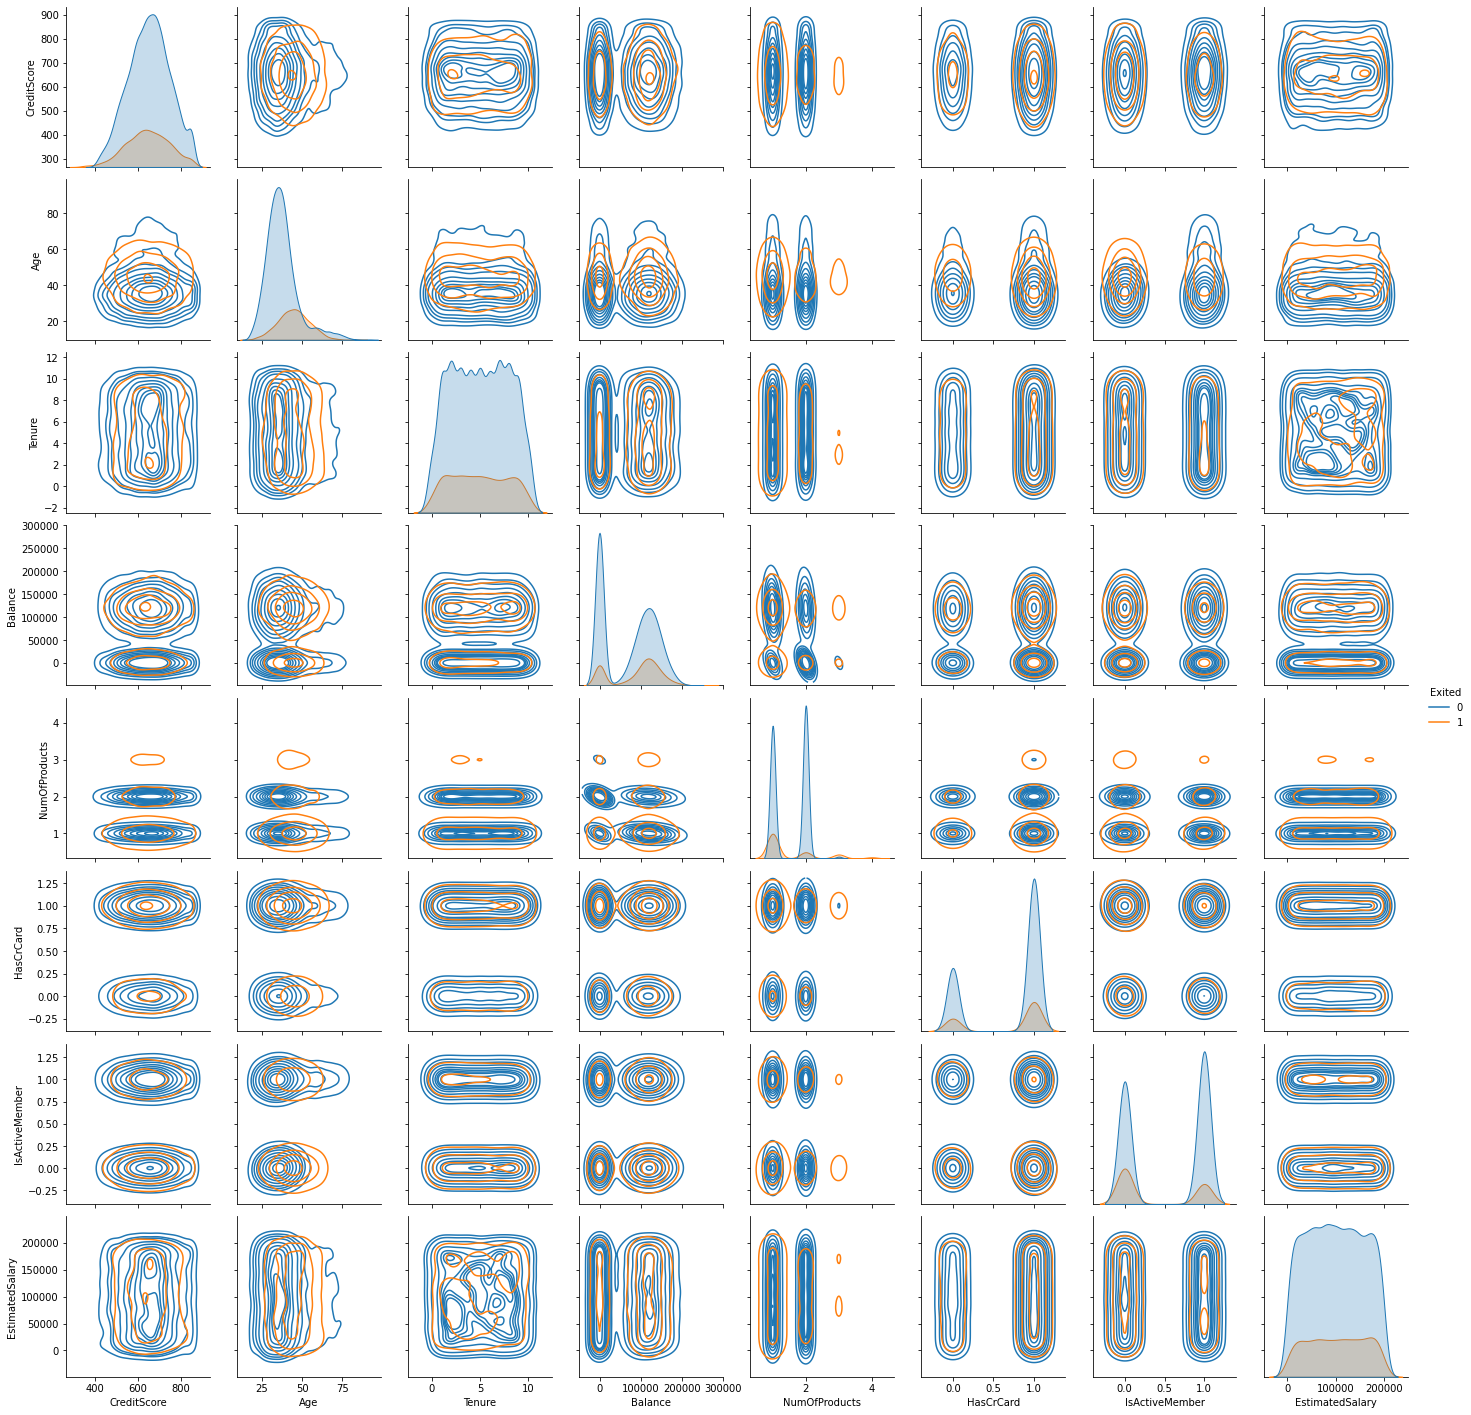

In [ ]:
# 12.7
_= sns.pairplot(data = data, hue ='Exited', kind = 'kde')

### Pointplots
See [here](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot).  
A pointplot highlights error-bars--makes comparsion of variations possible so also how much the summary value has changed.  


A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

In [ ]:
# 13.0
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
# 13.1
tips = sns.load_dataset("tips")

In [ ]:
# 13.2
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Following two plots, pointplot and barplot, give same information 

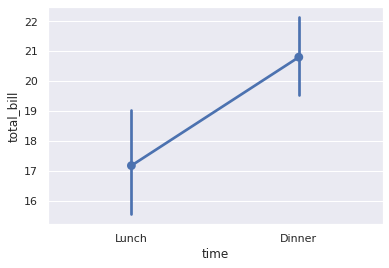

In [ ]:
# 13.3 Dispersion at Lunch is more than at Dinner
ax = sns.pointplot(
                   x="time",
                   y="total_bill",
                   data=tips
                   )

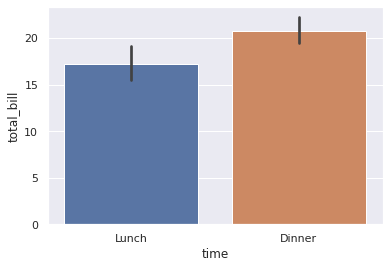

In [ ]:
# 13.4 Variation is difficult to compare in this bar plot
_= sns.barplot(data = tips, x = "time", y = "total_bill")

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

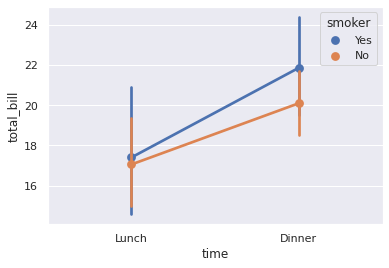

In [ ]:
# 13.5
ax = sns.pointplot(
                   x="time",
                   y="total_bill",
                   hue="smoker",
                   data=tips
                   )

Separate the points for different hue levels along the categorical axis. Larger slope of 'Blue' line indicates greater change in the 'mean' level of 'Yes' Smoker than those of 'No', smoker.

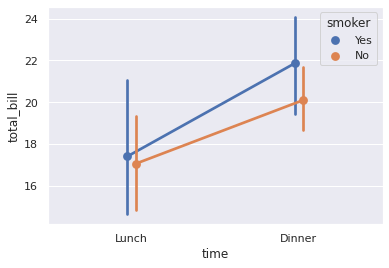

In [ ]:
# 13.6
ax = sns.pointplot(
                    x="time",
                    y="total_bill",
                    hue="smoker",
                    data=tips,
                    dodge=True
                   )

Compare the above errorplot and change in summary value (ie mean) with the following bar chart. The slopes in the above plots make it very clear that summary value (mean) has changed much more in the case of smoker == Yes than smoker == No. On the other hand variations in respective means have decreased.  <br>
In a barplot (see below) these observations are possible to make but take time. 

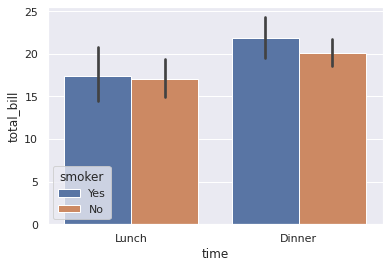

In [ ]:
# 13.7
_= sns.barplot(data = tips, x = "time", y = "total_bill", hue = "smoker")

Use median as the estimate of central tendency:

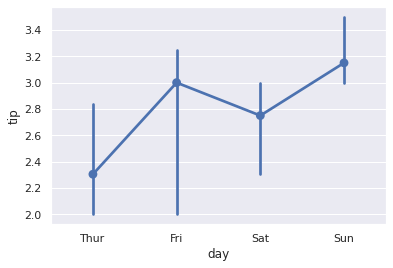

In [ ]:
# 13.8
from numpy import median
ax = sns.pointplot(
                    x="day",
                    y="tip",
                    data=tips,
                    estimator=median
                   )

### Maps using folium
A choropleth map (from Greek χῶρος choros 'area/region' and πλῆθος plethos 'multitude') is a type of thematic map in which a set of pre-defined areas is colored or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income. 

Get file `world-countries.json` from [here](https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json). This file records boundaries of all countries, their country-id and few other features.

In [ ]:
# 14.0
import folium
import pandas as pd

# 14.1 Get file world-countries.json from 
country_geo = 'world-countries.json'

In [ ]:
#14.2
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# 14.3 Add a country id column that corresponds to "id" in the json file
data.loc[data["Geography"]== "France", "id"] = "FRA"
data.loc[data["Geography"]== "Spain", "id"] = "EST"
data.loc[data["Geography"]== "Germany", "id"] = "DEU"

In [ ]:
# 14.4 Check
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,id
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,FRA
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,EST
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,FRA
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,FRA
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,EST


In [ ]:
# 14.5 Plot only for France and Germany
df = data.loc[data['Geography'] != 'Spain', ["id", "Balance"]]

In [ ]:
# 15.0 Setup a folium map at a high-level zoom
map = folium.Map(location=[-4.347843,43.403449], zoom_start=1.5)

# 15.1 Choropleth maps bind Pandas Data Frames and json geometries.
#      This allows us to quickly visualize data combinations
map.choropleth(geo_data=country_geo, data=df,
             columns=["id", "Balance"],
             key_on='feature.id',
             fill_color='YlGn',
             fill_opacity=0.7,
             line_opacity=0.2)
             #legend_name=hist_indicator)

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
# 15.2 Map shows stark differences between the two countries
#      Through the color intensities
map